<a href="https://colab.research.google.com/github/ammarff/TUBES_PENGANTAR_AI_FUZZY_LOGIC/blob/main/Tupro2_Kelompok8_Reasoning(Fuzzy_Logic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fuzzy Logic - Rekomendasi Bengkel**

Kelompok 8:


1.   Muhammad Ammar Fathin - 1301201053
2.   Anisa Adelya Ayuputri - 1301194024 




In [ ]:
# library paython yang digunakan
import numpy as np # digunakan untuk proses perhitungan 
import pandas as pd # digunakan untuk membaca file dataset yang diberikan
import matplotlib.pyplot as plt # digunakan untuk membuat plot fungsi keanggotaan dari masing masing variabel

## **Membaca File Dataset**

In [ ]:
!gdown --id 1tM02QJ98vT-nQ5qdUlahEugDE3Pnb7hr

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1tM02QJ98vT-nQ5qdUlahEugDE3Pnb7hr
To: /content/bengkel.xlsx
100% 16.9k/16.9k [00:00<00:00, 18.7MB/s]


In [ ]:
# memanggil library pandas untuk membaca file bengkel.xlsx
df = pd.read_excel('./bengkel.xlsx')
df.sample(10)

,id,servis,harga
57,58,31,1
50,51,48,10
83,84,11,2
33,34,93,4
41,42,94,10
23,24,100,9
45,46,38,1
62,63,78,7
59,60,79,6
2,3,98,2


# **Fuzzifikasi**

## **Membership Function**

#### **Fungsi Keanggotaan Harga**
#####  Nilai harga ≤ 3 bernilai murah
##### Nilai 4 ≤ harga ≤ 6 bernilai Biasa
##### Nilai 7 ≤ harga ≤ 8 bernilai mahal
##### Nilai harga ≥ 9 bernilai Sangat sangat mahal

In [ ]:
# fungsi untuk menentukan nilai keanggotan (nilai fuzzifikasi) dari variabel harga, menggunakan fungsi keanggotaan trapesium
def fuzzy_harga(x):
    harga = {'Murah': 0, 'Biasa': 0, 'Mahal': 0, 'Sangat Mahal': 0}

    a, b, c, d, e, f = 3, 4, 6, 7, 8, 9

    # Garis Datar
    if x <= a:
        harga['Murah'] = 1
    if b <= x <= c:
        harga['Biasa'] = 1
    if d <= x <= e:
        harga['Mahal'] = 1
    if x >= f:
        harga['Sangat Mahal'] = 1
    
    # Garis Miring (Gradient)
    if a < x <= b:
        harga['Murah'] = -(x - b) / (b - a)
    if a < x < b:
        harga['Biasa'] = (x - a) / (b - a)
    if c < x <= d:
        harga['Biasa'] = -(x - d) / (d - c)
    if c < x < d:
        harga['Mahal'] = (x - c) / (d - c)
    if e < x < f:
        harga['Mahal'] = -(x - f) / (f - e)
    if e < x <= f:
        harga['Sangat Mahal'] = (x - e) / (f - e)
        
    return harga

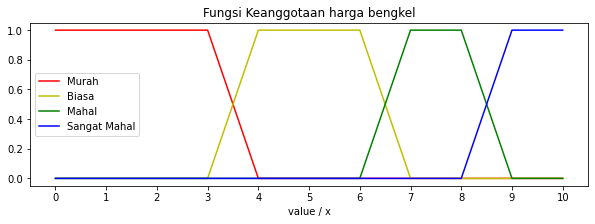

In [ ]:
# proses ini untuk menentukan plot yang terbentuk dari fungsi keanggotaan variabel harga, menggunakan fungsi keanggotaan trapesium
plt.figure(figsize=(10, 3))
plt.title("Fungsi Keanggotaan harga bengkel")

plt.plot(range(11), [fuzzy_harga(x)['Murah'] for x in range(11)], 'r')
plt.plot(range(11), [fuzzy_harga(x)['Biasa'] for x in range(11)], 'y')
plt.plot(range(11), [fuzzy_harga(x)['Mahal'] for x in range(11)], 'g')
plt.plot(range(11), [fuzzy_harga(x)['Sangat Mahal'] for x in range(11)], 'b')

plt.plot(0, 0, 'r', linewidth=1.5, label='Murah')
plt.plot(0, 0, 'y', linewidth=1.5, label='Biasa')
plt.plot(0, 0, 'g', linewidth=1.5, label='Mahal')
plt.plot(0, 0, 'b', linewidth=1.5, label='Sangat Mahal')

plt.xticks(list(range(11)))
plt.xlabel("value / x")
plt.legend()
plt.show()

#### **Fungsi Keanggotaan Servis**
##### Nilai servis ≤ 30 bernilai Sangat Kurang
##### Nilai 35 ≤ servis ≤ 60 bernilai Kurang dengan nilai dari 31 - 64
##### Nilai 65 ≤ servis ≤ 75 bernilai Baik dengan nilai dari 61 - 79
##### Nilai servis ≥ 80 bernilai Sangat Baik

In [ ]:
# fungsi untuk menentukan nilai keanggotan (nilai fuzzifikasi) dari variabel servis, menggunakan fungsi keanggotaan trapesium
def fuzzy_servis(x):
    servis = {'Sangat Kurang': 0, 'Kurang': 0, 'Baik': 0, 'Sangat Baik': 0}

    a, b, c, d, e, f = 30, 35, 60, 65, 75, 80
    
    # Garis Datar
    if x <= a:
        servis['Sangat Kurang'] = 1
    if b <= x <= c:
        servis['Kurang'] = 1
    if d <= x <= e:
        servis['Baik'] = 1
    if x >= f:
        servis['Sangat Baik'] = 1

    # Garis Miring (Gradient)   
    if a < x <= b:
        servis['Sangat Kurang'] = -(x - b) / (b - a)
    if a < x < b:
        servis['Kurang'] = (x - a) / (b - a)
    if c < x <= d:
        servis['Kurang'] = -(x - d) / (d - c)
    if c < x < d:
        servis['Baik'] = (x - c) / (d - c)
    if e < x < f:
        servis['Baik'] = -(x - f) / (f - e)
    if e < x <= f:
        servis['Sangat Baik'] = (x - e) / (f - e)
        
    return servis

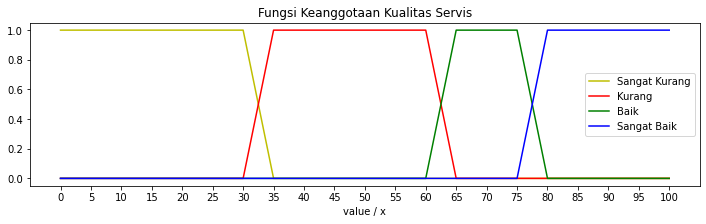

In [ ]:
# proses ini untuk menentukan plot yang terbentuk dari fungsi keanggotaan variabel servis, menggunakan fungsi keanggotaan trapesium
plt.figure(figsize=(12, 3))
plt.title("Fungsi Keanggotaan Kualitas Servis")

plt.plot(range(101), [fuzzy_servis(x)['Sangat Kurang'] for x in range(101)], 'y')
plt.plot(range(101), [fuzzy_servis(x)['Kurang'] for x in range(101)], 'r')
plt.plot(range(101), [fuzzy_servis(x)['Baik'] for x in range(101)], 'g')
plt.plot(range(101), [fuzzy_servis(x)['Sangat Baik'] for x in range(101)], 'b')

plt.plot(0, 0, 'y', linewidth=1.5, label='Sangat Kurang')
plt.plot(0, 0, 'r', linewidth=1.5, label='Kurang')
plt.plot(0, 0, 'g', linewidth=1.5, label='Baik')
plt.plot(0, 0, 'b', linewidth=1.5, label='Sangat Baik')

plt.xticks(np.arange(0, 105, 5.0))
plt.xlabel("value / x")
plt.legend()
plt.show()

## **Proses Fuzzifikasi**

In [ ]:
# fungsi ini digunakan untuk menentukan nilai fuzzy dari masing masing variabel, yaitu variabel harga dan servis untuk setiap id bengkel
fuzzify = []

for servis, harga in zip(df['servis'], df['harga']):
    fuzzy = {'servis': 0, 'harga': 0}

    fuzzy['servis'] = fuzzy_servis(servis)
    fuzzy['harga'] = fuzzy_harga(harga)

    fuzzify.append(fuzzy)

In [ ]:
# menampilkan contoh hasil nilai fuzzy yang telah didapatkan untuk variabel servis dan harga
print("Contoh Hasil Fuzzifikasi :\n")
for i in range(0, 20, 2):
    print("servis :", fuzzify[i]['servis'])
    print("harga   :", fuzzify[i]['harga'], end="\n\n")

Contoh Hasil Fuzzifikasi :

servis : {'Sangat Kurang': 0, 'Kurang': 1, 'Baik': 0, 'Sangat Baik': 0}
harga   : {'Murah': 0, 'Biasa': 0.0, 'Mahal': 1, 'Sangat Mahal': 0}

servis : {'Sangat Kurang': 0, 'Kurang': 0, 'Baik': 0, 'Sangat Baik': 1}
harga   : {'Murah': 1, 'Biasa': 0, 'Mahal': 0, 'Sangat Mahal': 0}

servis : {'Sangat Kurang': 1, 'Kurang': 0, 'Baik': 0, 'Sangat Baik': 0}
harga   : {'Murah': 0.0, 'Biasa': 1, 'Mahal': 0, 'Sangat Mahal': 0}

servis : {'Sangat Kurang': 0, 'Kurang': 0.8, 'Baik': 0.2, 'Sangat Baik': 0}
harga   : {'Murah': 0, 'Biasa': 0, 'Mahal': 1, 'Sangat Mahal': 0}

servis : {'Sangat Kurang': 0, 'Kurang': 1, 'Baik': 0, 'Sangat Baik': 0}
harga   : {'Murah': 1, 'Biasa': 0, 'Mahal': 0, 'Sangat Mahal': 0}

servis : {'Sangat Kurang': 1, 'Kurang': 0, 'Baik': 0, 'Sangat Baik': 0}
harga   : {'Murah': 0, 'Biasa': 1, 'Mahal': 0, 'Sangat Mahal': 0}

servis : {'Sangat Kurang': 0, 'Kurang': 0, 'Baik': 0, 'Sangat Baik': 1.0}
harga   : {'Murah': 1, 'Biasa': 0, 'Mahal': 0, 'Sangat M

# **Inferensi**

Tabel aturan inferensi yang dibuat :

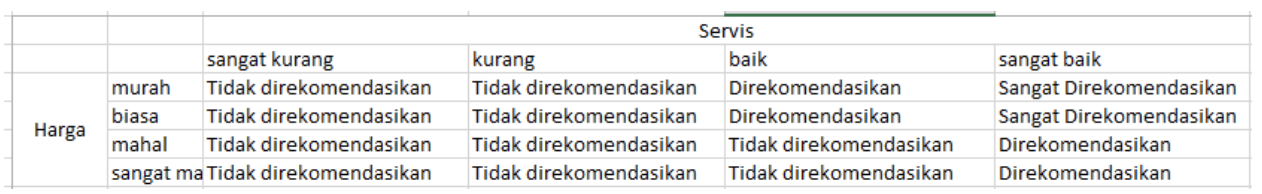

## **Fuzzy Set Rules (Konjungsi)**

In [ ]:
# Untuk setiap rules merupakan Konjungsi.
# Contoh: IF Harga = Murah (1) Λ Servis = Sangat Kurang (1) THEN Status = Tidak Direkomendasikan (1)

fuzzy_set_rules = {
    ('Murah', 'Sangat Kurang') : 'Tidak Direkomendasikan',
    ('Murah', 'Kurang') : 'Tidak Direkomendasikan',
    ('Murah', 'Baik') : 'Direkomendasikan',
    ('Murah', 'Sangat Baik') : 'Sangat Direkomendasikan',
    ('Biasa', 'Sangat Kurang') : 'Tidak Direkomendasikan',
    ('Biasa', 'Kurang') : 'Tidak Direkomendasikan',
    ('Biasa', 'Baik') : 'Direkomendasikan',
    ('Biasa', 'Sangat Baik') : 'Sangat Direkomendasikan',
    ('Mahal', 'Sangat Kurang') : 'Tidak Direkomendasikan',
    ('Mahal', 'Kurang') : 'Direkomendasikan',
    ('Mahal', 'Baik') : 'Tidak Direkomendasikan',
    ('Mahal', 'Sangat Baik') : 'Direkomendasikan',
    ('Sangat Mahal', 'Sangat Kurang') : 'Tidak Direkomendasikan',
    ('Sangat Mahal', 'Kurang') : 'Tidak Direkomendasikan',
    ('Sangat Mahal', 'Baik') : 'Tidak Direkomendasikan',
    ('Sangat Mahal', 'Sangat Baik') : 'Direkomendasikan',
}

## **Proses Inferensi**

In [ ]:
# fungsi ini dilakukan untuk mencari nilai inferensi dan nilai minimal yang didapatkan untuk masing masing status yang dihasilkan
inference_result = []

def inference(fuzzed):
    result = {'Tidak Direkomendasikan': 0, "Direkomendasikan": 0, "Sangat Direkomendasikan": 0}

    for servis in fuzzed['servis'].keys():
        for harga in fuzzed['harga'].keys():
            min_value = min(fuzzed['harga'][harga], fuzzed['servis'][servis])

            # Proses Conjunction Sesuai Fuzzy Rules pada variabel fuzzy_set_rules
            output = fuzzy_set_rules[(harga, servis)]

            if min_value > result[output]:
               result[output] = min_value

    return result

In [ ]:
# melakukan perhitungan nilai inferensi untuk semua id bengkel
for fuzzed in fuzzify:
    inference_result.append(inference(fuzzed))

# menampilkan contoh inferensi yang didapatkan 
print("Contoh Hasil Inferensi :\n")
for i in range(0, 40, 2):
    print(inference_result[i])

Contoh Hasil Inferensi :

{'Tidak Direkomendasikan': 0, 'Direkomendasikan': 1, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 0, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 1}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 0.2, 'Direkomendasikan': 0.8, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 0, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 1}
{'Tidak Direkomendasikan': 0, 'Direkomendasikan': 0.4, 'Sangat Direkomendasikan': 0.6}
{'Tidak Direkomendasikan': 0, 'Direkomendasikan': 1, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 'Sangat Direkomendasikan': 0}
{'Tidak Direkomendasikan': 1, 'Direkomendasikan': 0, 

# **Defuzzifikasi**

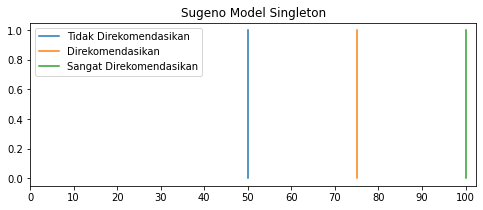

In [ ]:
# dilakukan untuk menampilkan plot yang digunakan untuk proses defuzzifikasi, menggunakan model sugeno
plt.figure(figsize=(8, 3))
plt.title("Sugeno Model Singleton")

plt.plot([50, 50], [0, 1], label="Tidak Direkomendasikan") # nilai untuk tidak direkomendasikan = 50
plt.plot([75, 75], [0, 1], label="Direkomendasikan") # nilai untuk direkomendasikan = 75
plt.plot([100, 100], [0, 1], label="Sangat Direkomendasikan") # nilai untuk sangat direkomendasikan = 100
plt.xticks(np.arange(0, 110, 10.0))
plt.legend()
plt.show()

In [ ]:
# fungsi ini untuk mennghitung nilai output defuzzifikasi yang dihasilkan 
deffuzy = {'Tidak Direkomendasikan': 50, "Direkomendasikan": 75, "Sangat Direkomendasikan": 100}

def defuzzification(inference, deffuzy):
    numerator, denominator = 0, 0
    
    for output in deffuzy.keys():
        numerator += inference[output] * deffuzy[output]
        denominator += inference[output]
        
    return numerator/denominator

final = []

for inference in inference_result:
    final.append(defuzzification(inference, deffuzy)) 

In [ ]:
# menampilkan contoh defuzifikasi untuk 8 data
print("Contoh Hasil Defuzifikasi:\n")
for i in range(0, 40, 5):
    print(f'Data Ke-{i+1} = {final[i]}')   

Contoh Hasil Defuzifikasi:

Data Ke-1 = 75.0
Data Ke-6 = 50.0
Data Ke-11 = 50.0
Data Ke-16 = 100.0
Data Ke-21 = 50.0
Data Ke-26 = 50.0
Data Ke-31 = 50.0
Data Ke-36 = 50.0


# **Hasil**

In [ ]:
# menampilkan 10 data id bengkel terbaik yang dihasilkan, berdasarkan kualitas servis dan nilai harganya
df['result'] = final
df = df.sort_values(by='result', ascending=False)[:10]

df['id'].to_excel('peringkat.xls', index=False, header=False)  
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  after removing the cwd from sys.path.


,id,servis,harga,result
91,92,83,3,100.0
2,3,98,2,100.0
51,52,94,3,100.0
33,34,93,4,100.0
12,13,80,3,100.0
90,91,98,3,100.0
15,16,82,6,100.0
59,60,79,6,95.0
14,15,78,5,90.0
54,55,50,7,75.0
